In [379]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pypalettes import load_cmap

In [380]:
df_22 = pd.read_csv("/kaggle/input/hahe-statistics/hahe_2022.csv")
df_23 = pd.read_csv("/kaggle/input/hahe-statistics/hahe_2023.csv")
df_24 = pd.read_csv("/kaggle/input/hahe-statistics/hahe_2024.csv")
df_25 = pd.read_csv("/kaggle/input/hahe-statistics/hahe_2025.csv")

In [381]:
cmap = load_cmap("Pastel")

In [382]:
translation_map = {
    "Ανωτάτη Σχολή Καλών Τεχνών": "Athens School of Fine Arts",
    "Αριστοτέλειο Πανεπιστήμιο Θεσσαλονίκης": "Aristotle University of Thessaloniki",
    "ΑΣΠΑΙΤΕ": "School of Pedagogical and Technological Education (ASPETE)",
    "Γεωπονικό Πανεπιστήμιο Αθηνών": "Agricultural University of Athens",
    "Δημοκρίτειο Πανεπιστήμιο Θράκης": "Democritus University of Thrace",
    "Διεθνές Πανεπιστήμιο της Ελλάδος": "International Hellenic University",
    "Εθνικό και Καποδιστριακό Πανεπιστήμιο Αθηνών": "National and Kapodistrian University of Athens",
    "Εθνικό Μετσόβιο Πολυτεχνείο": "National Technical University of Athens",
    "Ελληνικό Ανοικτό Πανεπιστήμιο": "Hellenic Open University",
    "Ελληνικό Μεσογειακό Πανεπιστήμιο": "Hellenic Mediterranean University",
    "Ιόνιο Πανεπιστήμιο": "Ionian University",
    "Οικονομικό Πανεπιστήμιο Αθηνών": "Athens University of Economics and Business",
    "Πανεπιστήμιο Αιγαίου": "University of the Aegean",
    "Πανεπιστήμιο Δυτικής Αττικής": "University of West Attica",
    "Πανεπιστήμιο Δυτικής Μακεδονίας": "University of Western Macedonia",
    "Πανεπιστήμιο Θεσσαλίας": "University of Thessaly",
    "Πανεπιστήμιο Ιωαννίνων": "University of Ioannina",
    "Πανεπιστήμιο Κρήτης": "University of Crete",
    "Πανεπιστήμιο Μακεδονίας": "University of Macedonia",
    "Πανεπιστήμιο Πατρών": "University of Patras",
    "Πανεπιστήμιο Πειραιώς": "University of Piraeus",
    "Πανεπιστήμιο Πελοποννήσου": "University of the Peloponnese",
    "Πάντειον Πανεπιστήμιο Κοινωνικών και Πολιτικών Επιστημών": "Panteion University of Social and Political Sciences",
    "Πολυτεχνείο Κρήτης": "Technical University of Crete",
    "Στρατιωτική Σχολή Ευελπίδων": "Hellenic Army Academy",
    "Σχολή Ικάρων": "Hellenic Air Force Academy",
    "Σχολή Ναυτικών Δοκίμων": "Hellenic Naval Academy",
    "Χαροκόπειο Πανεπιστήμιο": "Harokopio University of Athens"
}

df_22["institution"] = df_22["institution"].map(translation_map)
df_23["institution"] = df_23["institution"].map(translation_map)
df_24["institution"] = df_24["institution"].map(translation_map)
df_25["institution"] = df_25["institution"].map(translation_map)


In [383]:
dfs = [df_22, df_23, df_24, df_25]
years = ["2020-2021", "2021-2022", "2022-2023", "2023-2024"]

all_active = [df["active"].sum() for df in dfs]
all_registered = [df["registered"].sum() for df in dfs]
all_graduate = [df["graduate"].sum() for df in dfs]
all_enrolled = [df["enrolled"].sum() for df in dfs]

df_all = pd.DataFrame({
    "years": years,
    "active": all_active,
    "registered": all_registered,
    "graduate": all_graduate,
    "enrolled": all_enrolled
})

df_all

,years,active,registered,graduate,enrolled
0,2020-2021,400242,707197,56728,91541
1,2021-2022,380830,705318,57377,81012
2,2022-2023,363209,696878,54289,69978
3,2023-2024,352099,703857,55095,68759


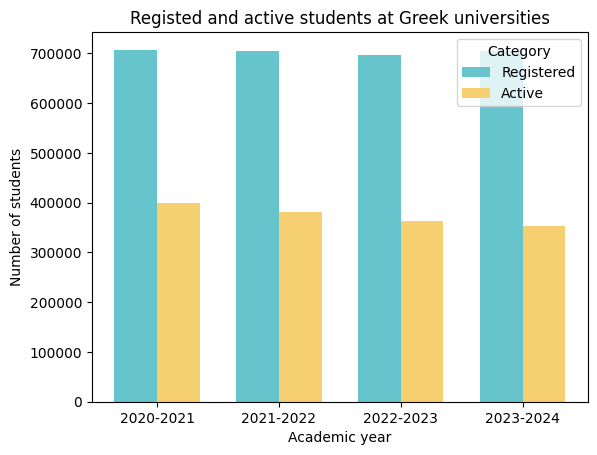

In [384]:
x = np.arange(len(years))  # x locations for the groups
width = 0.35  # width of each bar

fig, ax = plt.subplots()

ax.bar(x - width/2, all_registered, width, label="Registered", color=cmap.colors[0])
ax.bar(x + width/2, all_active, width, label="Active", color=cmap.colors[1])

ax.set_xlabel("Academic year")
ax.set_ylabel("Number of students")
ax.set_title("Registed and active students at Greek universities")
ax.set_xticks(x)
ax.set_xticklabels(years)
ax.legend(title="Category")

plt.show()


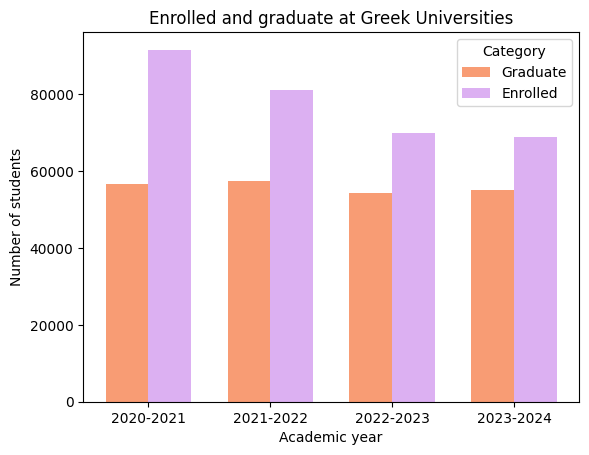

In [385]:
x = np.arange(len(years))  # x locations for the groups
width = 0.35  # width of each bar

fig, ax = plt.subplots()

ax.bar(x - width/2, all_graduate, width, label="Graduate", color=cmap.colors[2])
ax.bar(x + width/2, all_enrolled, width, label="Enrolled", color=cmap.colors[3])

ax.set_xlabel("Academic year")
ax.set_ylabel("Number of students")
ax.set_title("Enrolled and graduate at Greek Universities")
ax.set_xticks(x)
ax.set_xticklabels(years)
ax.legend(title="Category")

plt.show()


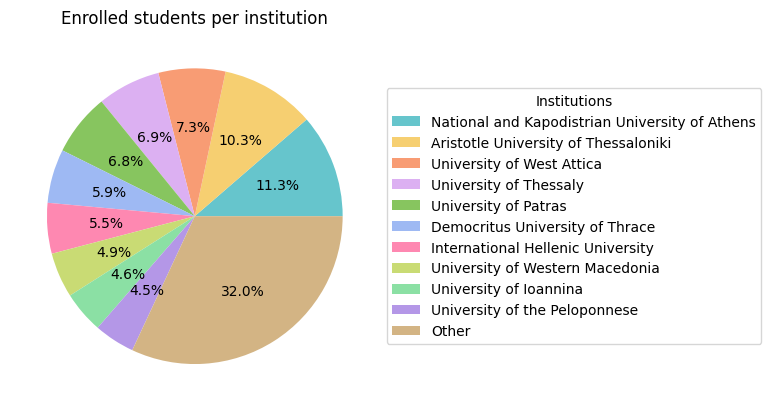

In [386]:
top_10 = df_25.sort_values(by="enrolled", ascending=False).head(10)
other = df_25.sort_values(by="enrolled", ascending=False).tail(len(df_25) - 10)

enrolled_25 = np.concatenate([top_10["enrolled"], [other["enrolled"].sum()]])
institutions = np.concatenate([top_10["institution"], ["Other"]])

fig, ax = plt.subplots()
wedges, texts, autotext = ax.pie(enrolled_25, autopct='%1.1f%%', colors=cmap.colors)
ax.legend(wedges, institutions,
          title="Institutions",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))


ax.set_title("Enrolled students per institution")

plt.show()

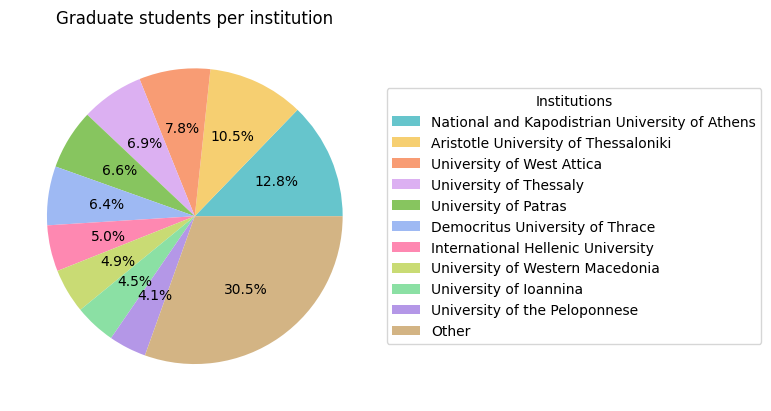

In [387]:
top_10 = df_25.sort_values(by="graduate", ascending=False).head(10)
other = df_25.sort_values(by="graduate", ascending=False).tail(len(df_25) - 10)

graduate_25 = np.concatenate([top_10["graduate"], [other["graduate"].sum()]])

fig, ax = plt.subplots()
wedges, texts, autotext = ax.pie(graduate_25, autopct='%1.1f%%', colors=cmap.colors)
ax.legend(wedges, institutions,
          title="Institutions",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))


ax.set_title("Graduate students per institution")

plt.show()

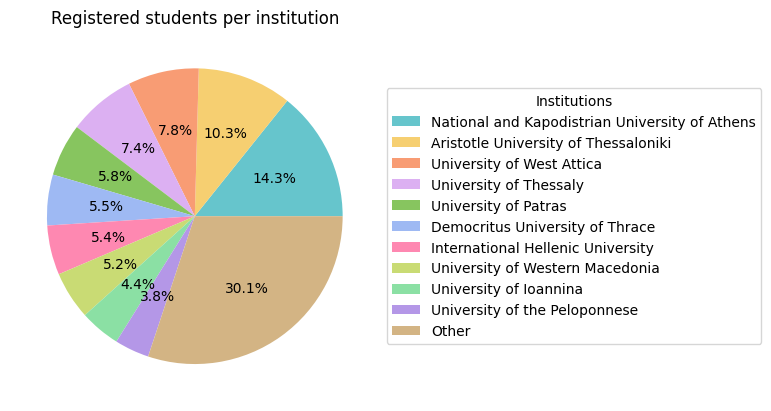

In [388]:
top_10 = df_25.sort_values(by="registered", ascending=False).head(10)
other = df_25.sort_values(by="registered", ascending=False).tail(len(df_25) - 10)

registered_25 = np.concatenate([top_10["registered"], [other["registered"].sum()]])

fig, ax = plt.subplots()
wedges, texts, autotext = ax.pie(registered_25, autopct='%1.1f%%', colors=cmap.colors)
ax.legend(wedges, institutions,
          title="Institutions",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))


ax.set_title("Registered students per institution")

plt.show()

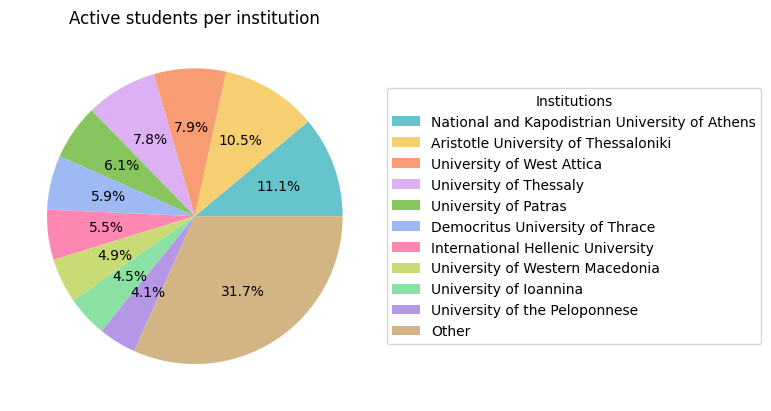

In [389]:
top_10 = df_25.sort_values(by="active", ascending=False).head(10)
other = df_25.sort_values(by="active", ascending=False).tail(len(df_25) - 10)

active_25 = np.concatenate([top_10["active"], [other["active"].sum()]])

fig, ax = plt.subplots()
wedges, texts, autotext = ax.pie(active_25, autopct='%1.1f%%', colors=cmap.colors)
ax.legend(wedges, institutions,
          title="Institutions",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))


ax.set_title("Active students per institution")

plt.show()

In [390]:
def calc_pie_stats(df, metric):
    top_10 = df.sort_values(by=metric, ascending=False).head(10)
    other = df.sort_values(by=metric, ascending=False).tail(len(df) - 10)
    return np.concatenate([top_10[metric], [other[metric].sum()]])


In [391]:
def plot_student_percentages(df, year):
    # top_10 = df.sort_values(by="active", ascending=False).head(10)
    # other = df.sort_values(by="active", ascending=False).tail(len(df) - 10)
    active = calc_pie_stats(df, "active")
    registered = calc_pie_stats(df, "registered")
    graduate = calc_pie_stats(df, "graduate")
    enrolled = calc_pie_stats(df, "enrolled")
    
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 15))

    wedges, texts, autotext = ax1.pie(enrolled, autopct='%1.1f%%', colors=cmap.colors)
    ax2.pie(graduate, autopct='%1.1f%%', colors=cmap.colors)
    ax3.pie(registered, autopct='%1.1f%%', colors=cmap.colors)
    ax4.pie(active, autopct='%1.1f%%', colors=cmap.colors)
    
    ax1.legend(wedges, institutions,
              title="Institutions",
              loc="center left",
              bbox_to_anchor=(2.5, -0.5, 0.5, 1))
    
    ax1.set_title("Enrolled students per institution")
    ax2.set_title("Graduate students per institution")
    ax3.set_title("Registered students per institution")
    ax4.set_title("Active students per institution")
    fig.suptitle(f"Acedemic year {year}")
    plt.show()

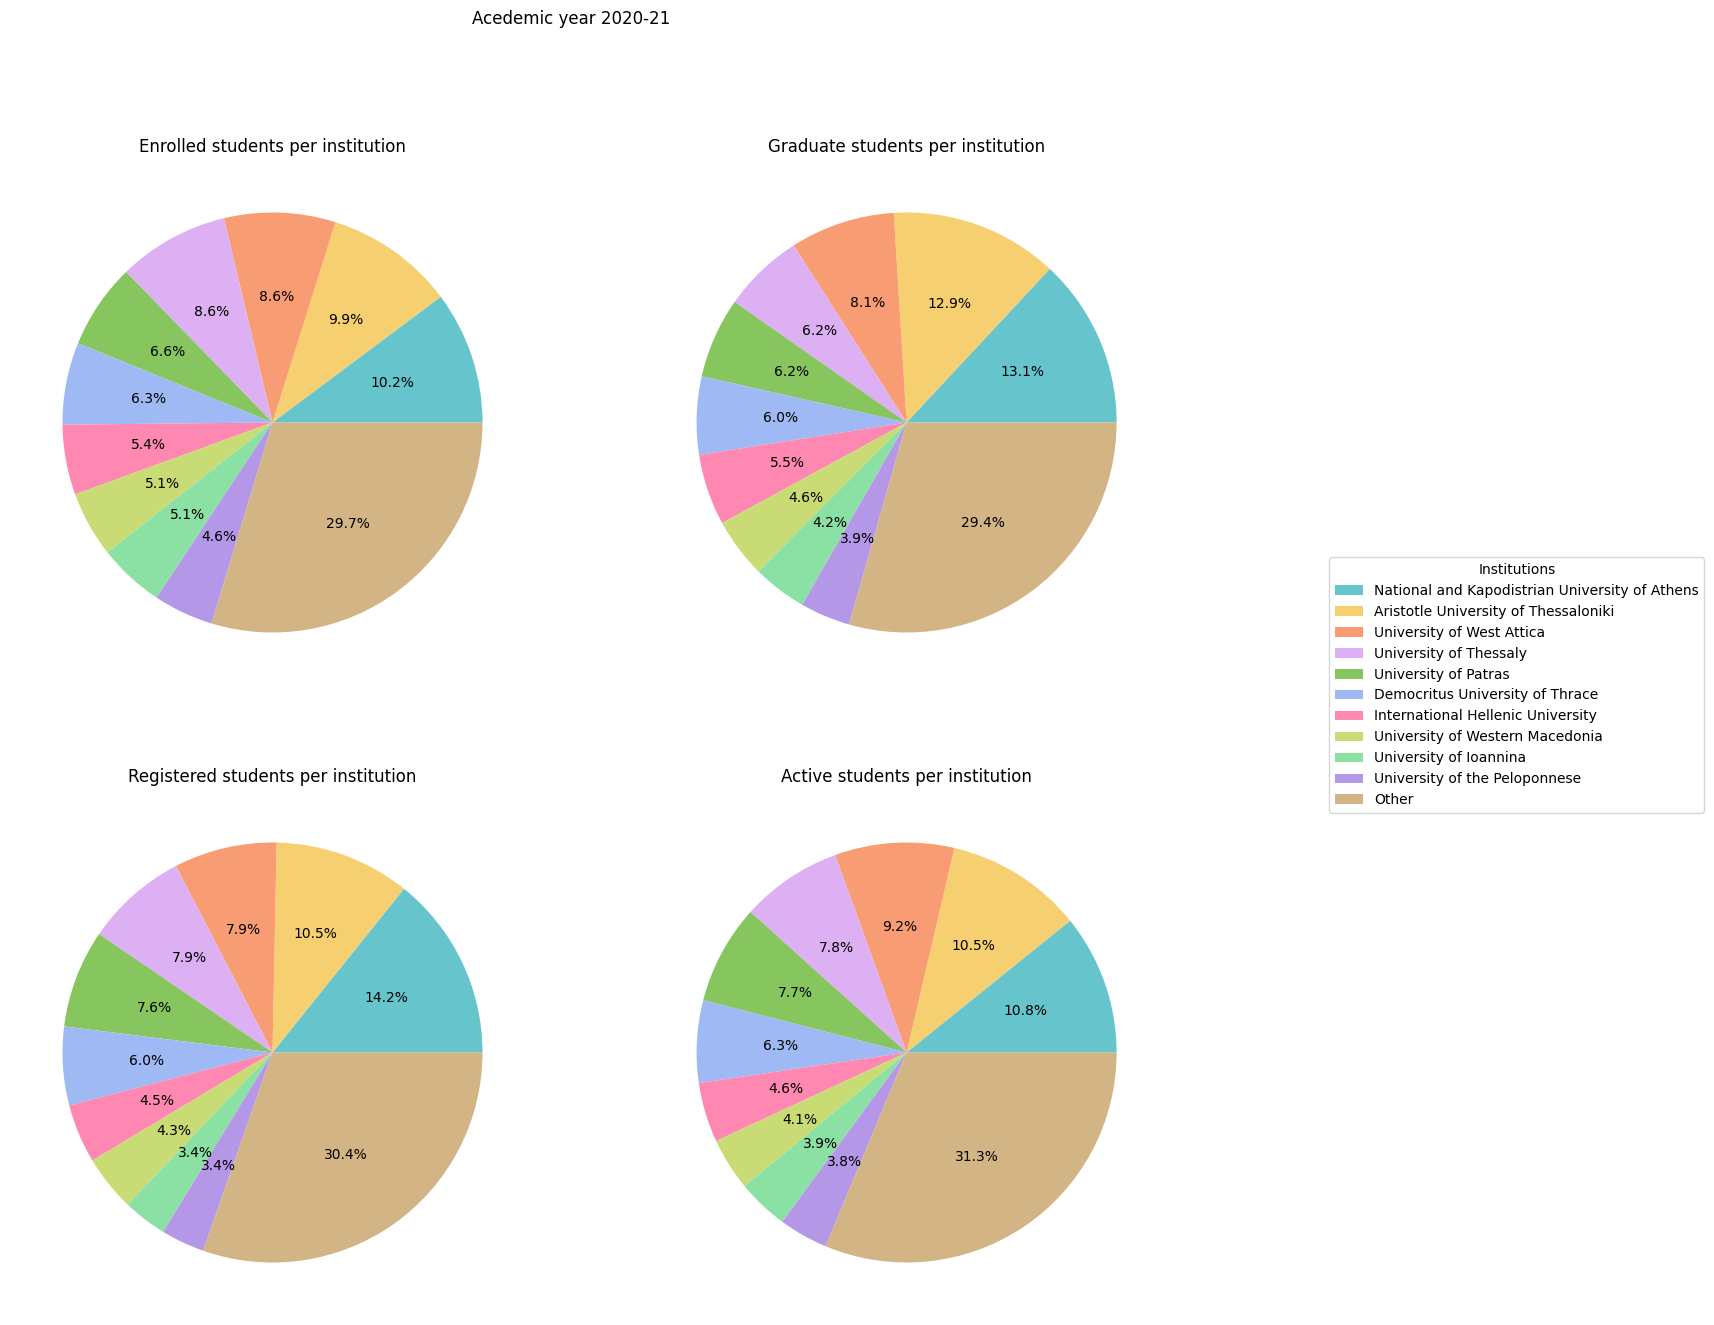

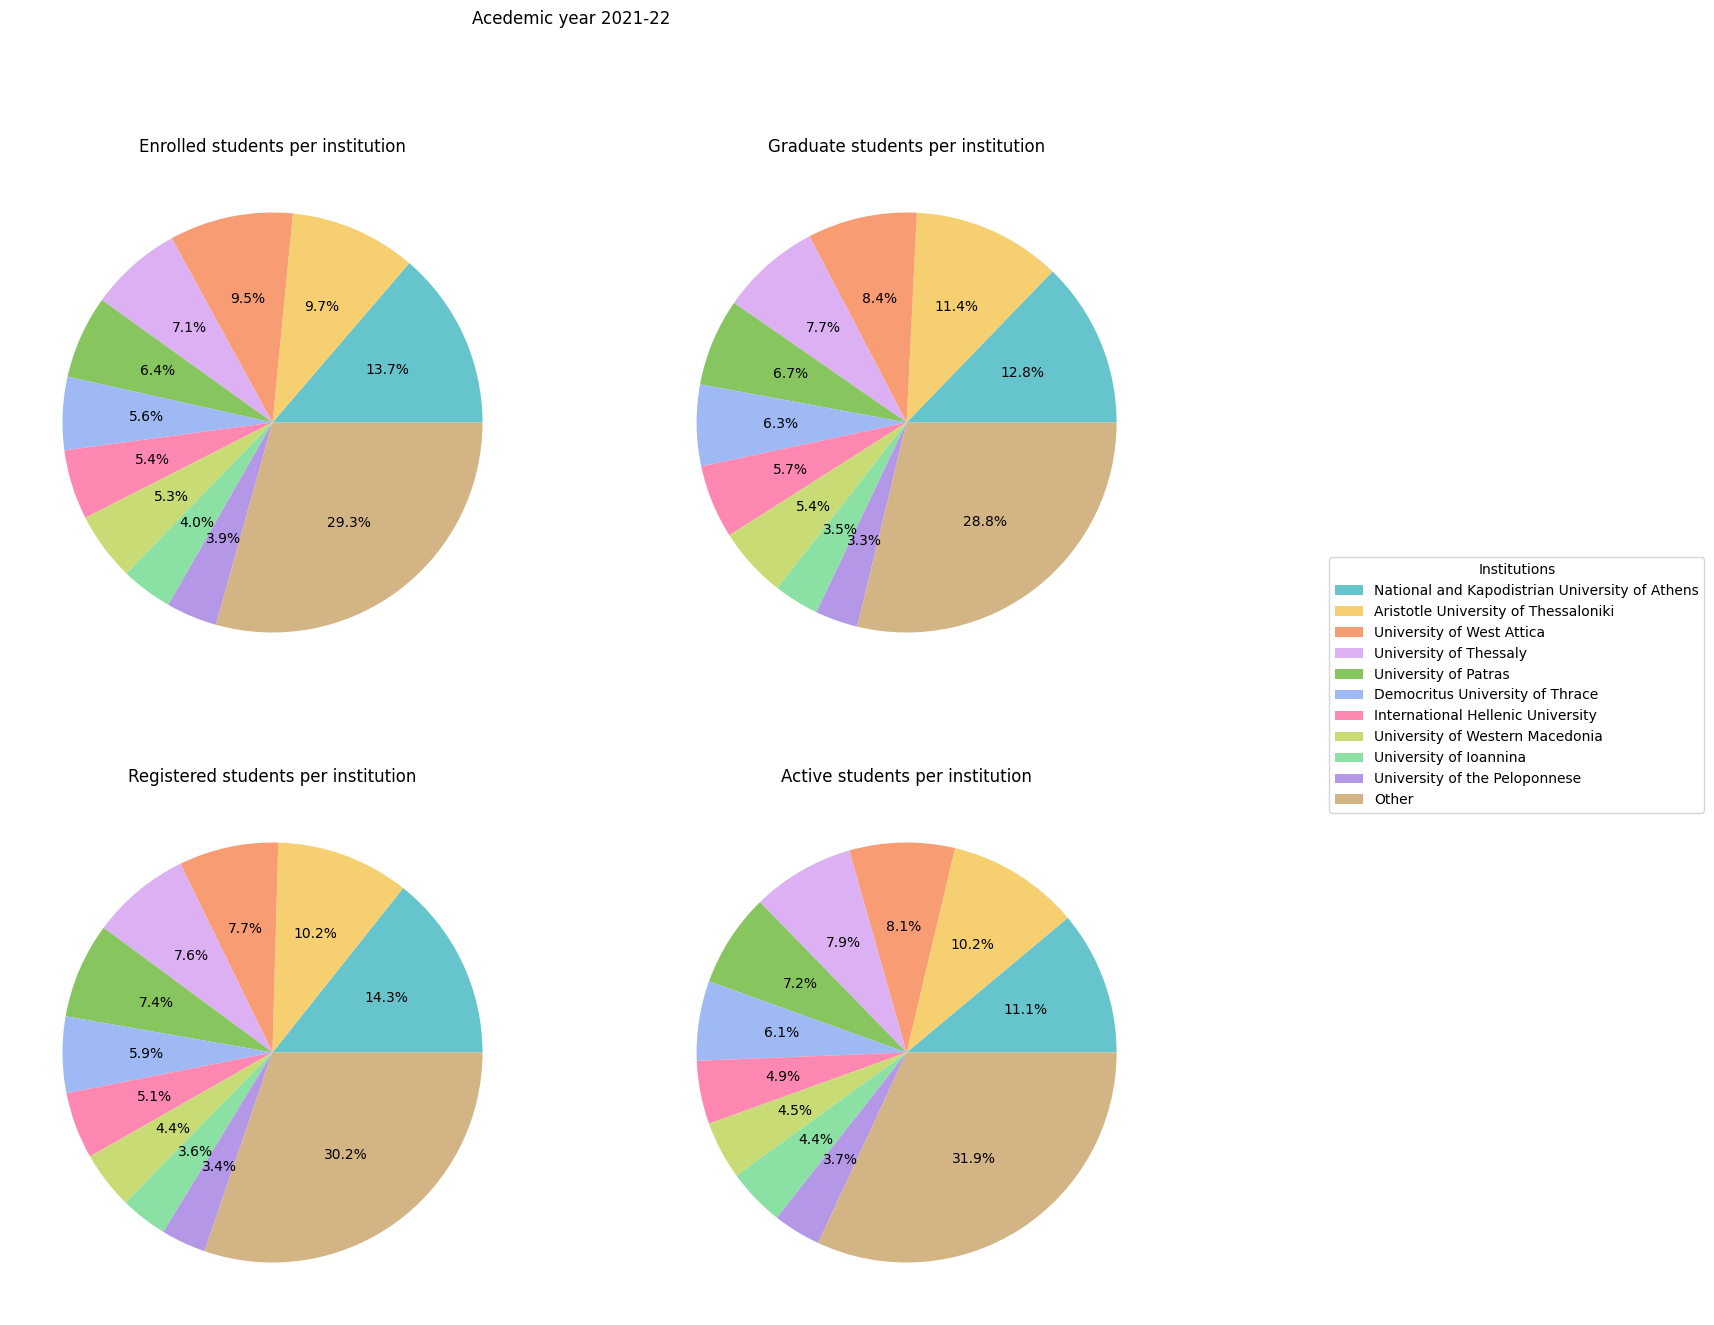

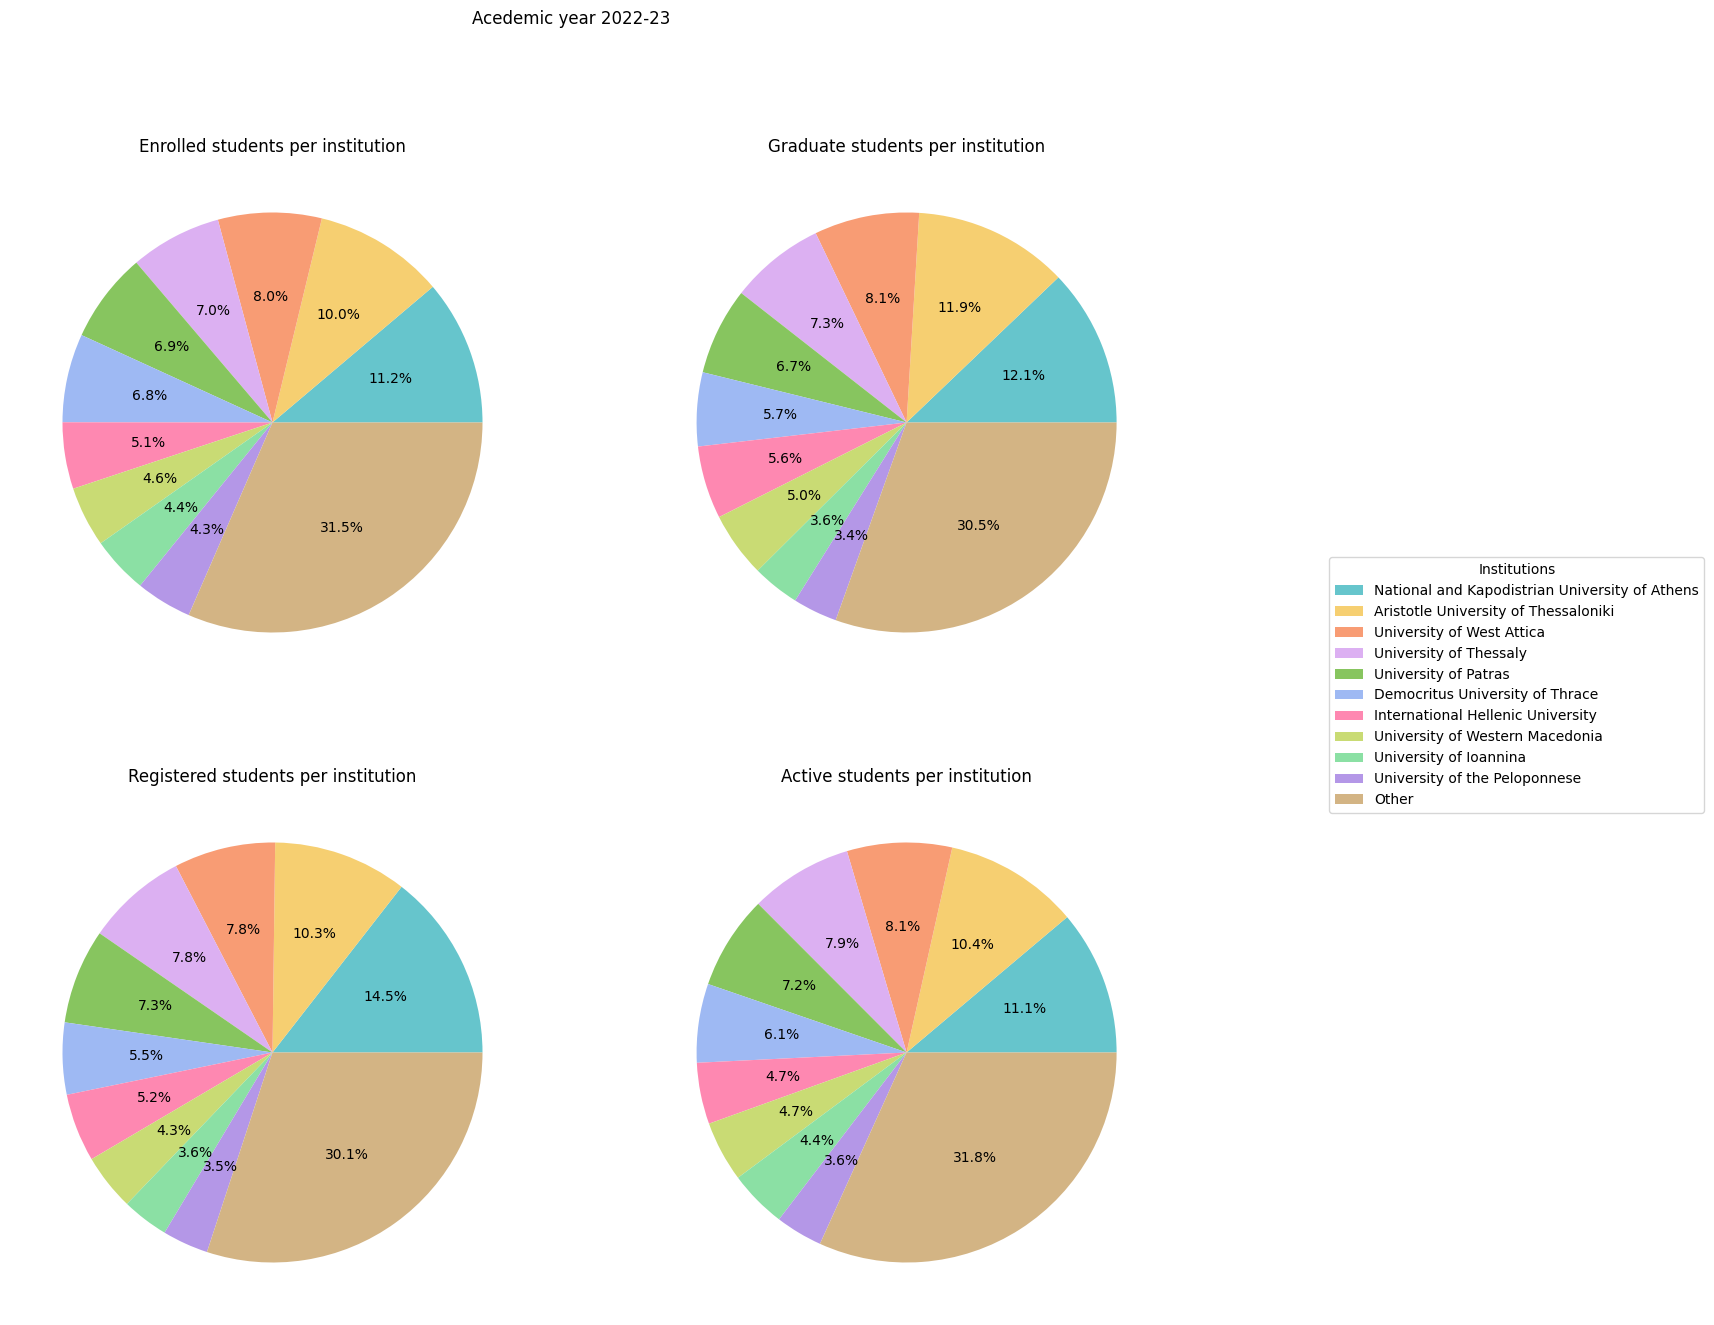

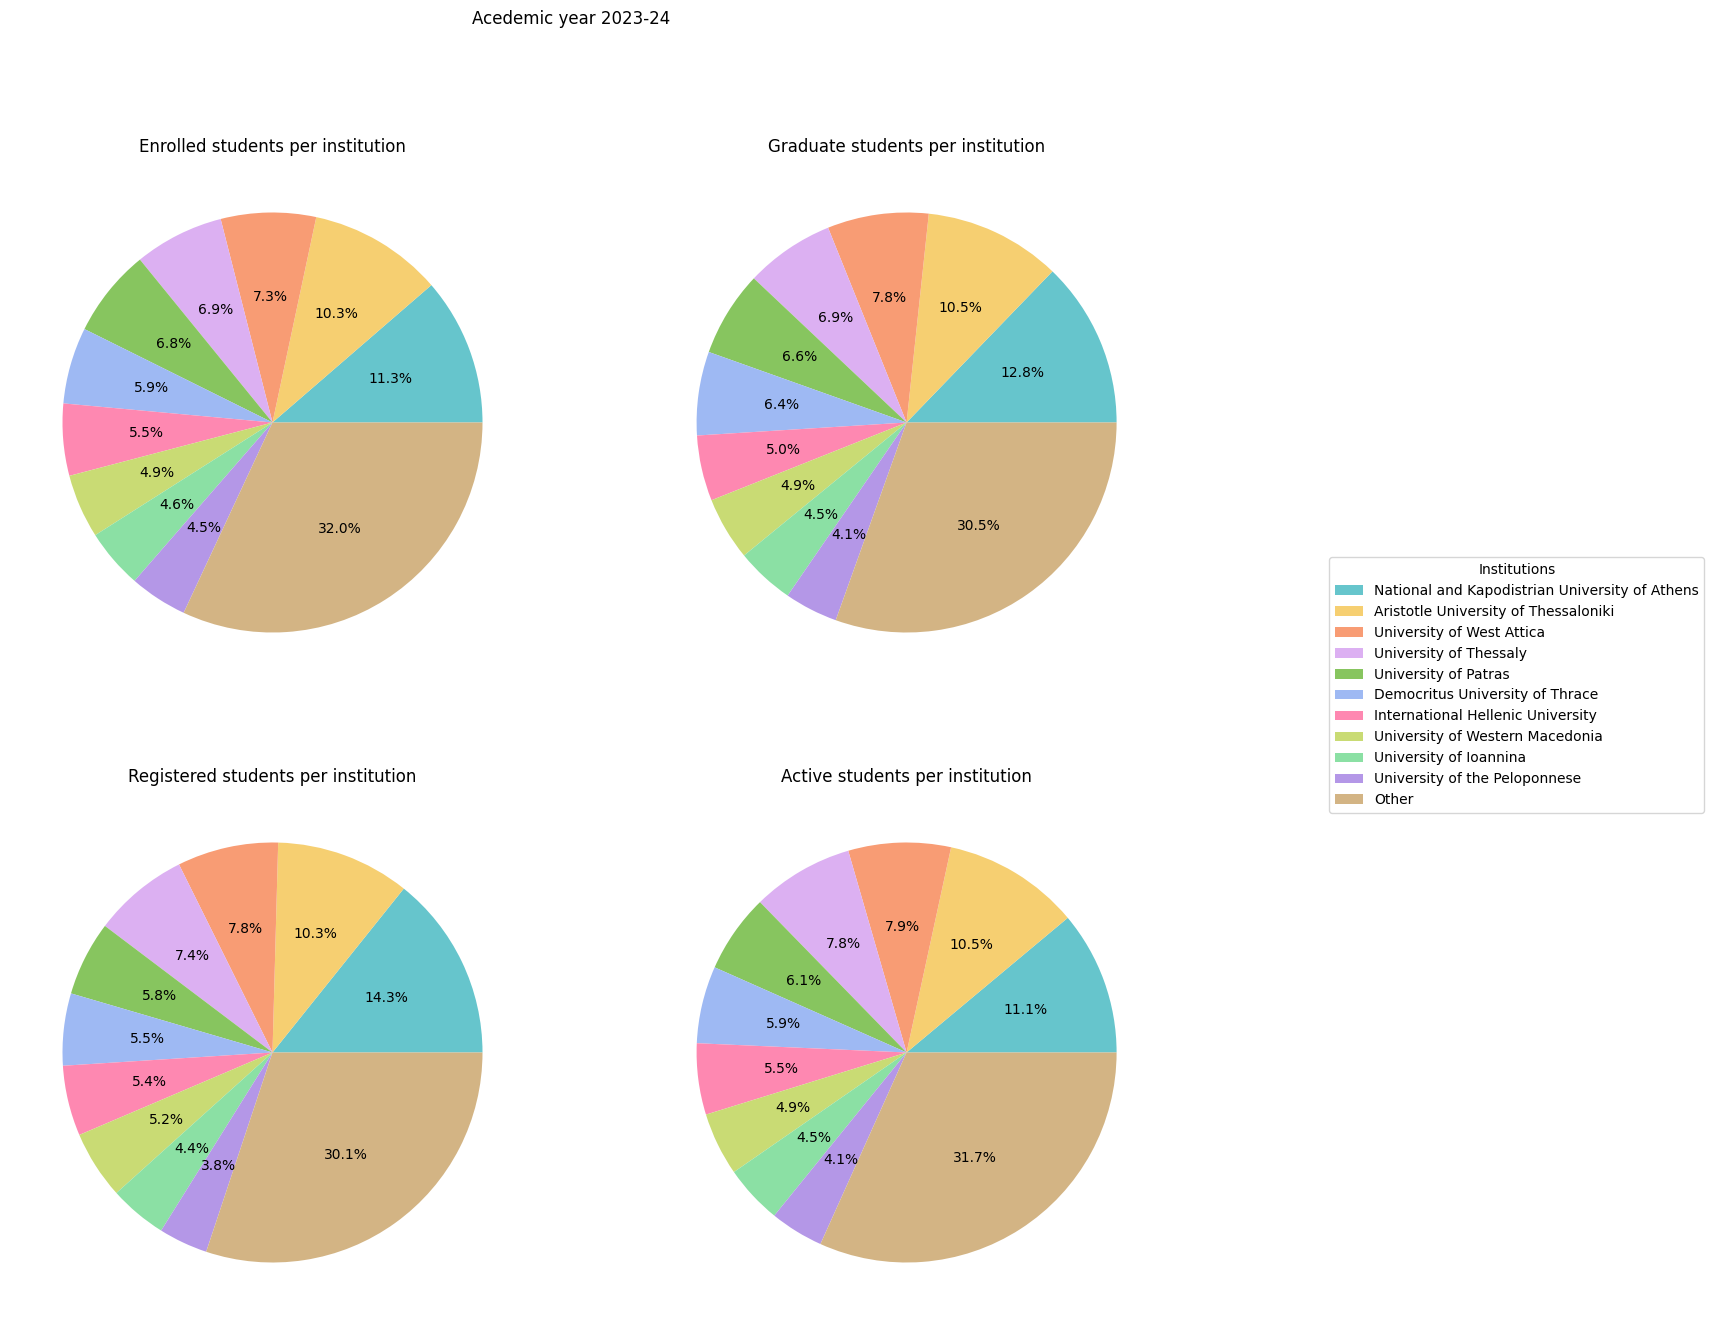

In [392]:
plot_student_percentages(df_22, "2020-21")
plot_student_percentages(df_23, "2021-22")
plot_student_percentages(df_24, "2022-23")
plot_student_percentages(df_25, "2023-24")


In [393]:
df_25["active_rate"] = (
    df_25.groupby("institution")["active"].transform("sum")
    / df_25.groupby("institution")["registered"].transform("sum")
) * 100

df_25["graduate_rate"] = (
    df_25.groupby("institution")["graduate"].transform("sum")
    / df_25.groupby("institution")["active"].transform("sum")
) * 100

In [394]:
def add_rates(df):
    df = df.copy()  # avoid modifying original if not desired
    grouped = df.groupby("institution")[["active", "registered", "graduate"]].transform("sum")
    df["active_rate"] = (grouped["active"] / grouped["registered"]) * 100
    df["graduate_rate"] = (grouped["graduate"] / grouped["active"]) * 100
    return df

df_22 = add_rates(df_22)
df_23 = add_rates(df_23)
df_24 = add_rates(df_24)
df_25 = add_rates(df_25)

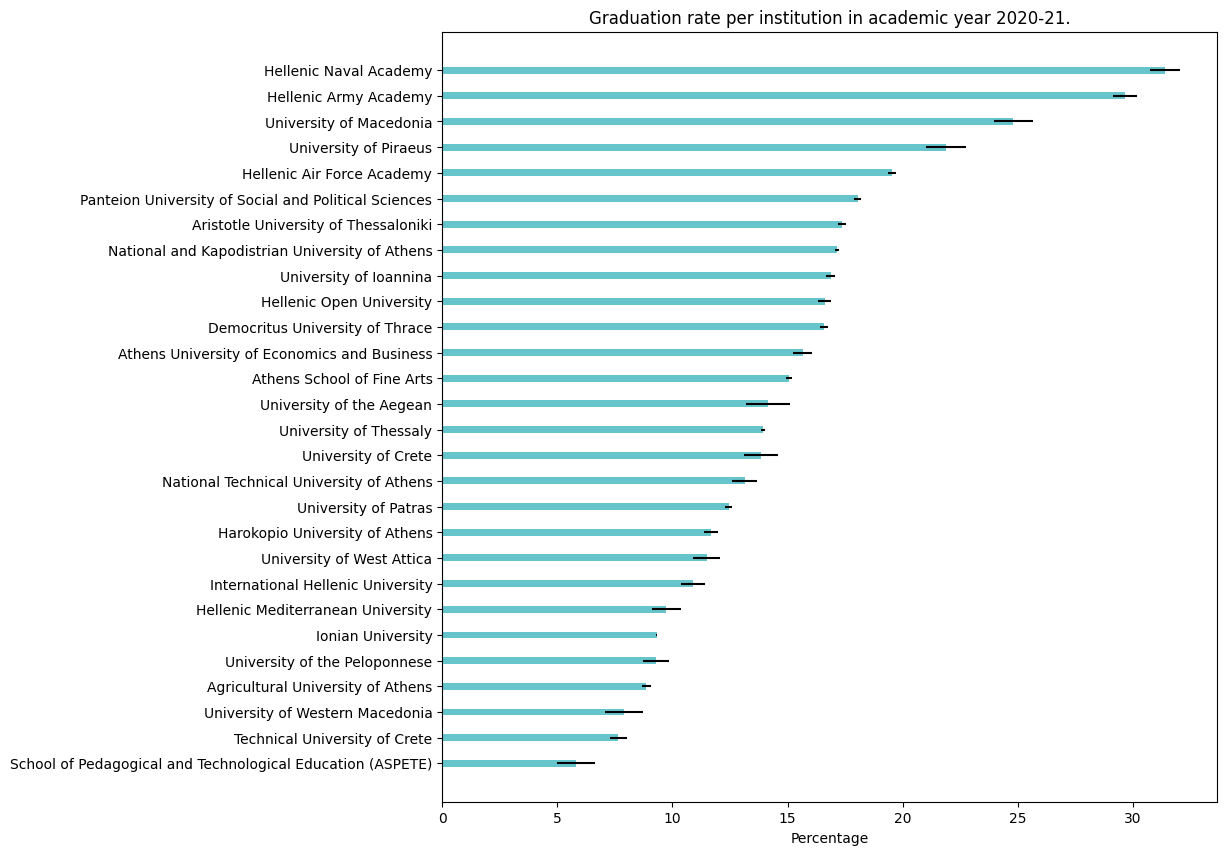

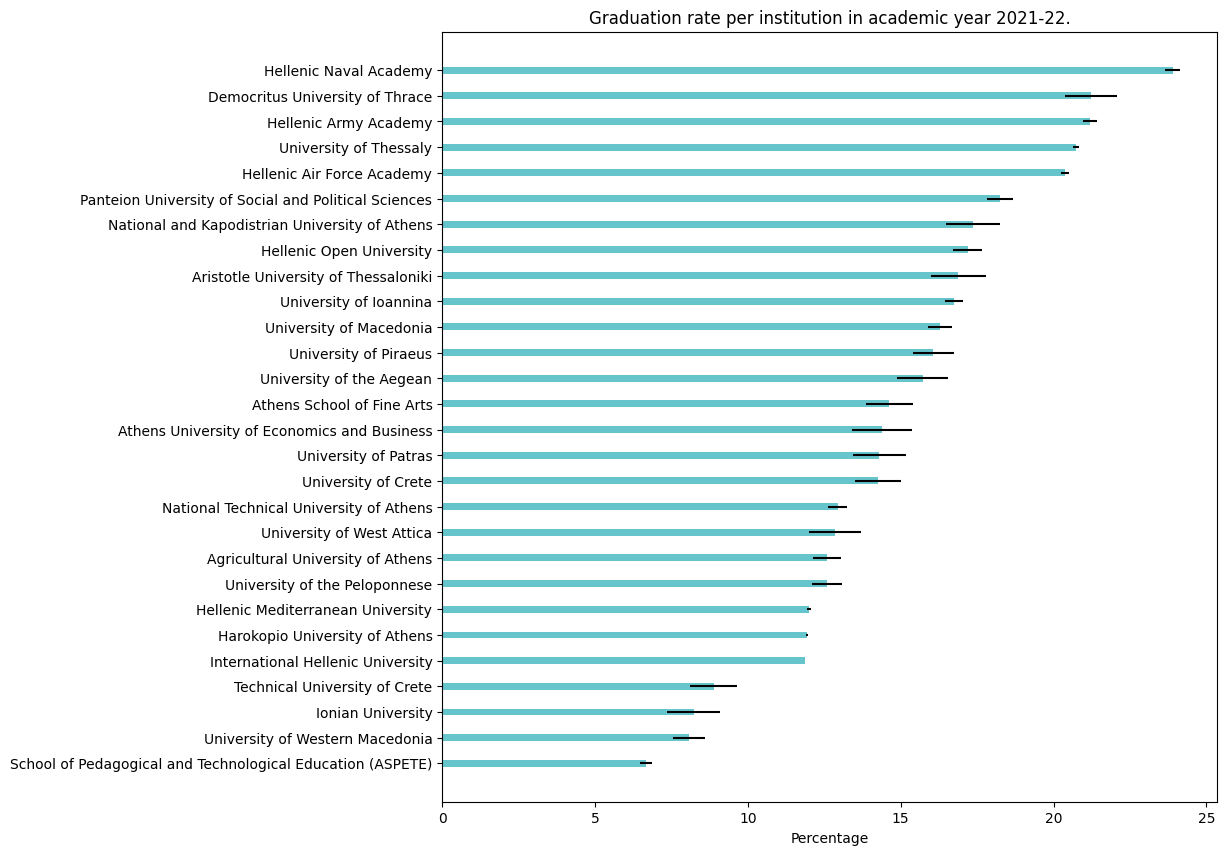

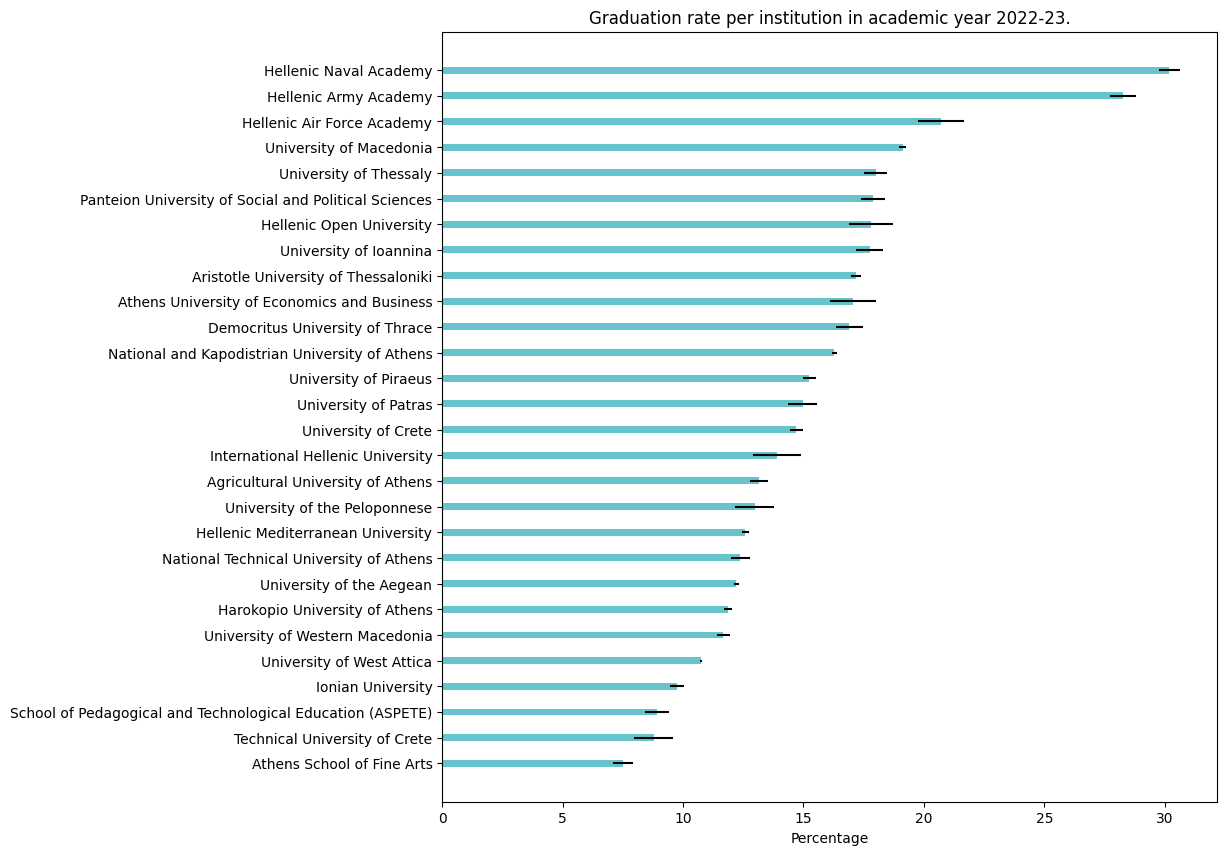

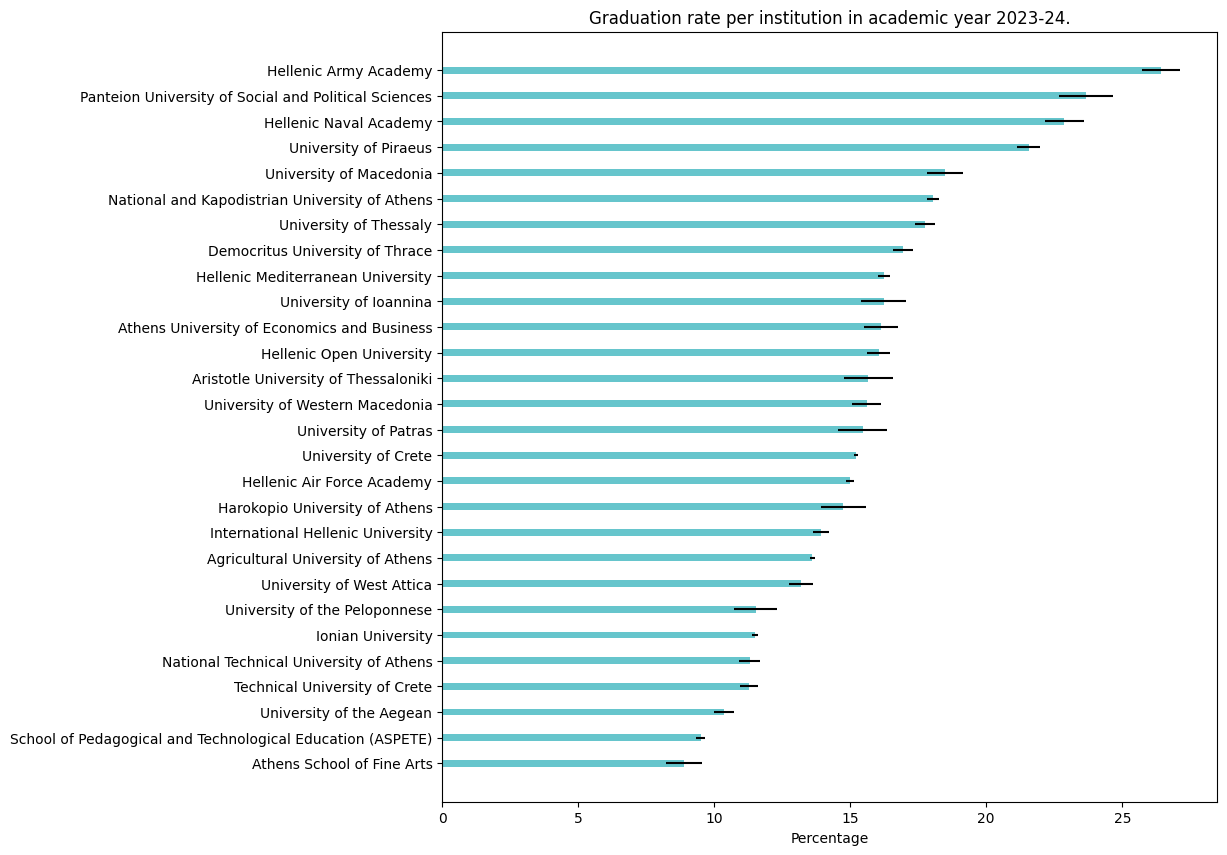

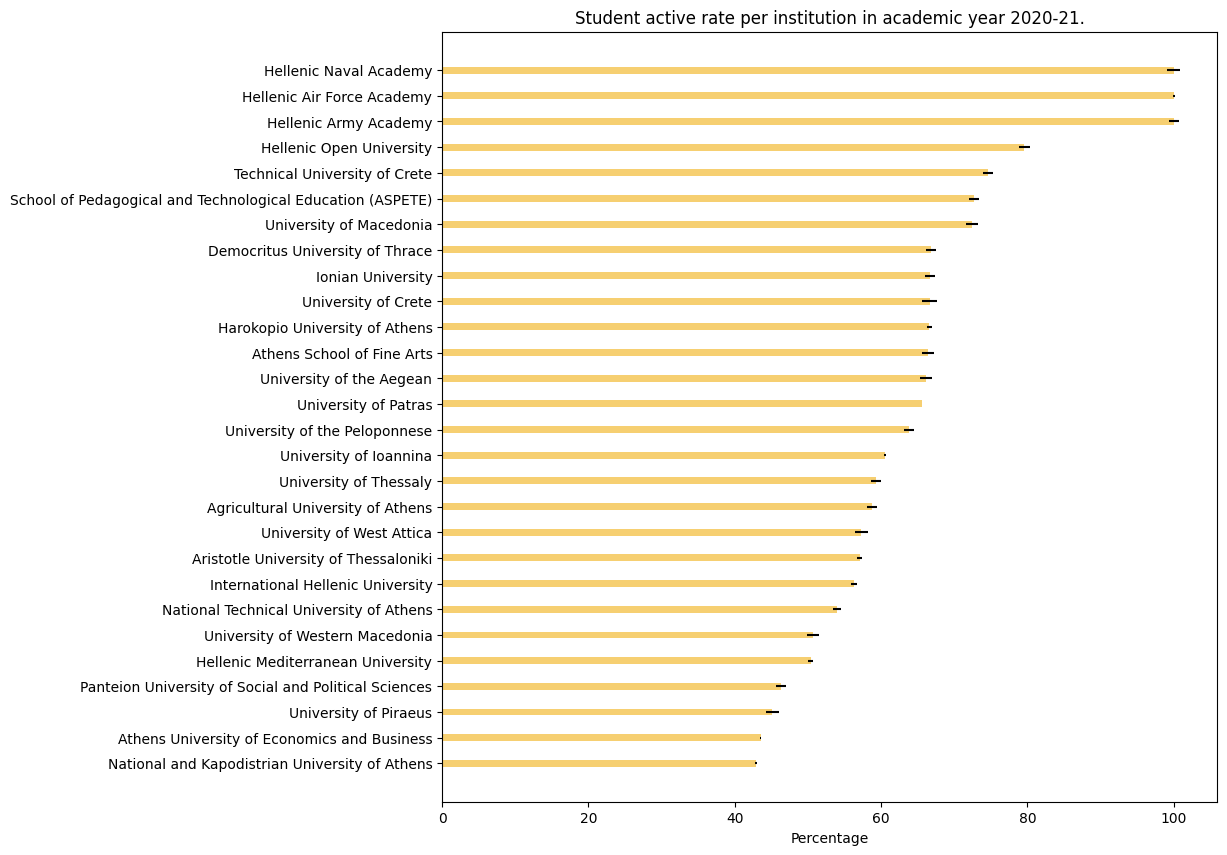

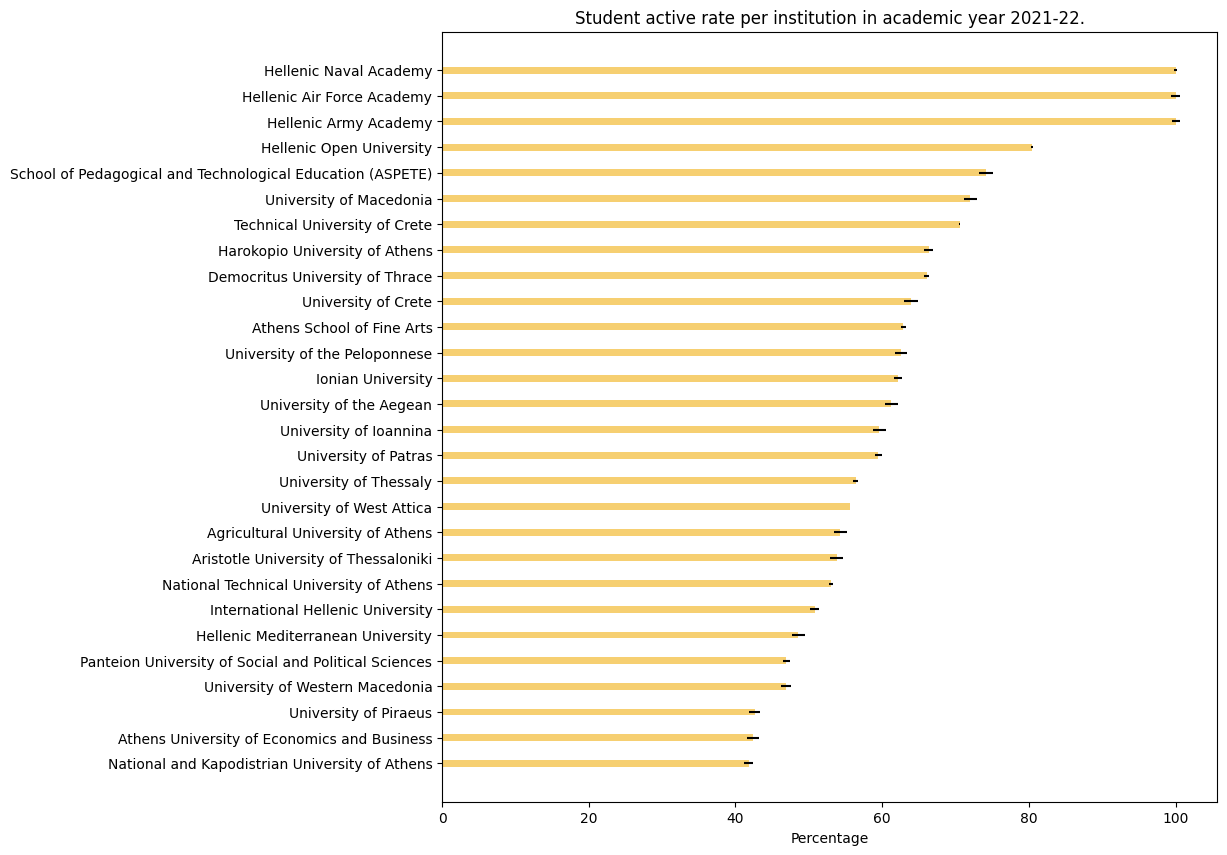

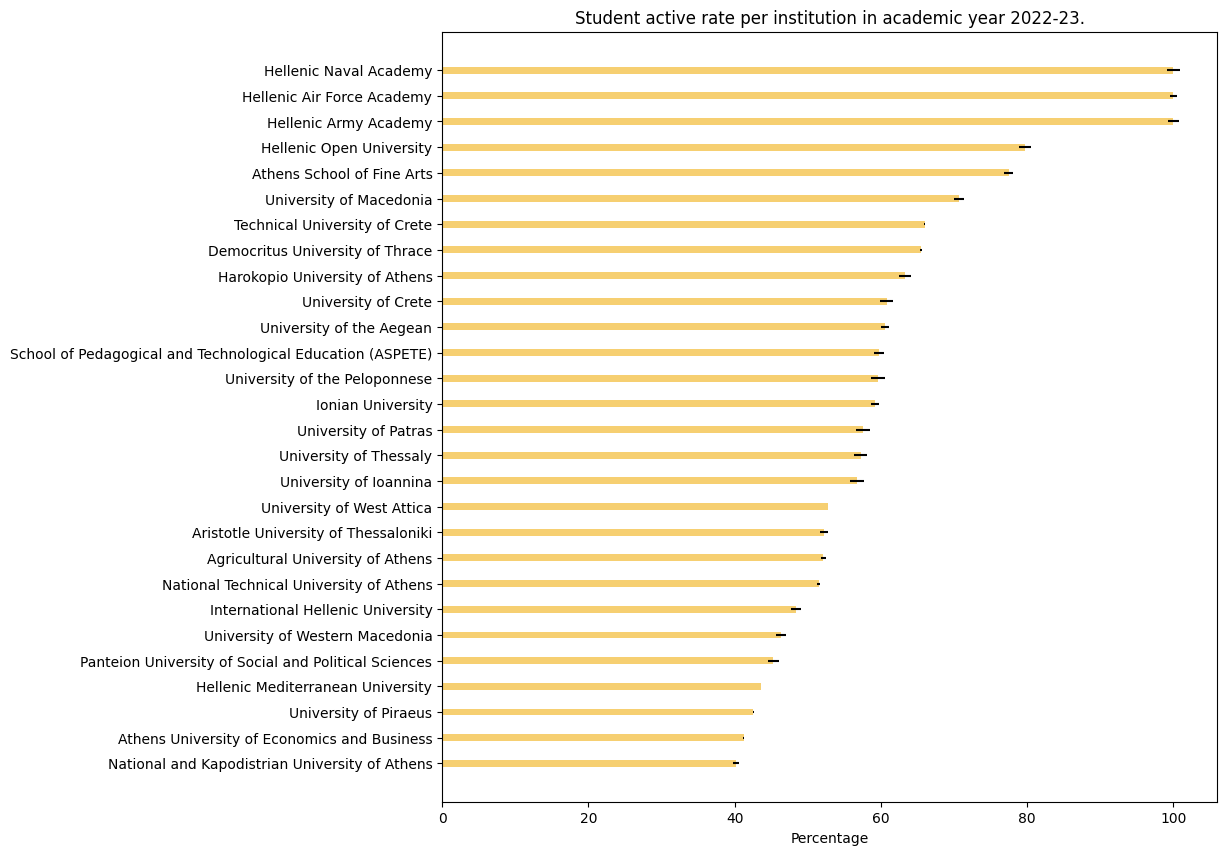

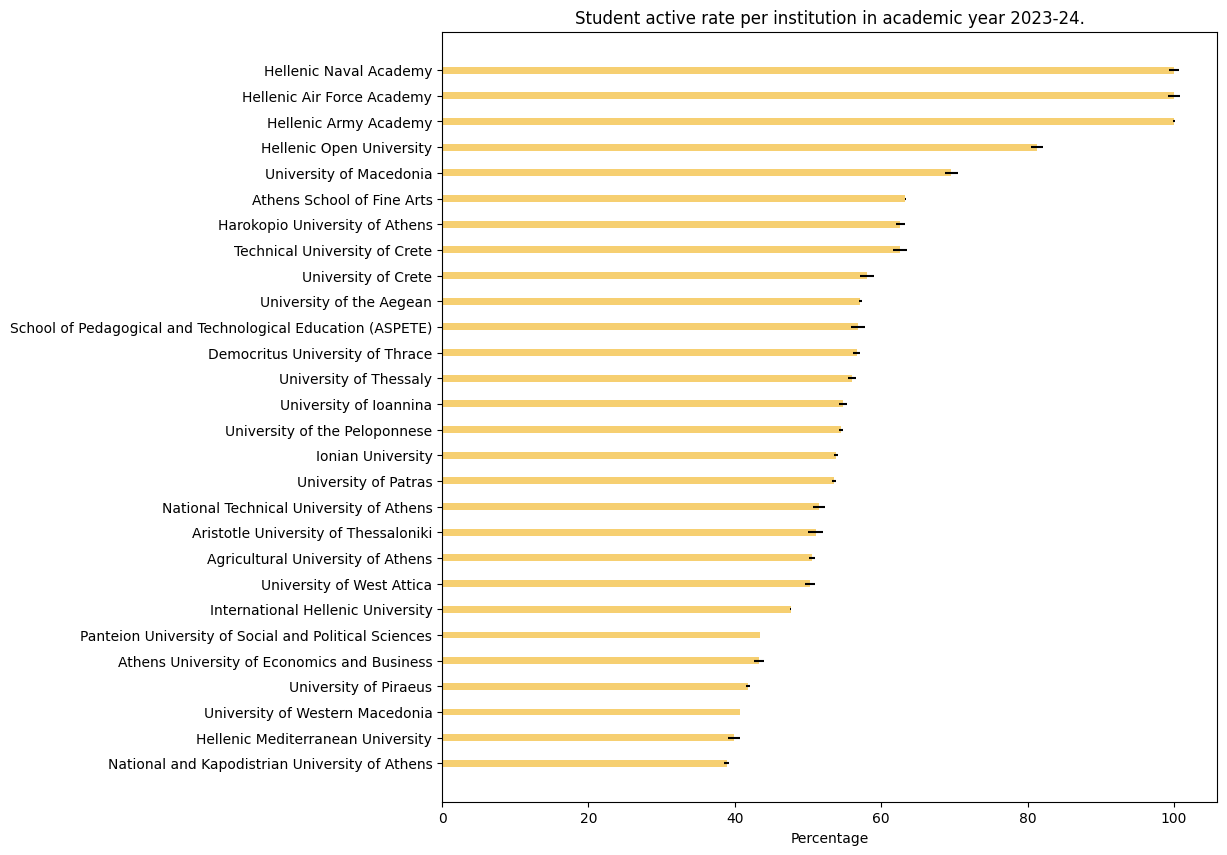

In [407]:
def plot_graduation_rate(df, year):
    # Sort by graduate_rate
    df_sorted = df.sort_values(by="graduate_rate", ascending=False)
    
    # Prepare positions and error bars
    y_pos = np.arange(len(df_sorted)) * 3
    error = np.random.rand(len(df_sorted))
    
    # Create figure
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.barh(y_pos, df_sorted["graduate_rate"], xerr=error, align="center", color=cmap.colors[0])
    ax.set_yticks(y_pos)
    ax.set_yticklabels(df_sorted["institution"])
    ax.invert_yaxis()  # Highest rate at top
    ax.set_xlabel("Percentage")
    ax.set_title(f"Graduation rate per institution in academic year {year}.")
    plt.show()

def plot_active_rate(df, year):
    # Sort by active_rate
    df_sorted = df.sort_values(by="active_rate", ascending=False)
    
    # Prepare positions and error bars
    y_pos = np.arange(len(df_sorted)) * 3
    error = np.random.rand(len(df_sorted))
    
    # Create figure
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.barh(y_pos, df_sorted["active_rate"], xerr=error, align="center", color=cmap.colors[1])
    ax.set_yticks(y_pos)
    ax.set_yticklabels(df_sorted["institution"])
    ax.invert_yaxis()  # Highest rate at top
    ax.set_xlabel("Percentage")
    ax.set_title(f"Student active rate per institution in academic year {year}.")
    plt.show()


plot_graduation_rate(df_22, "2020-21")
plot_graduation_rate(df_23, "2021-22")
plot_graduation_rate(df_24, "2022-23")
plot_graduation_rate(df_25, "2023-24")

plot_active_rate(df_22, "2020-21")
plot_active_rate(df_23, "2021-22")
plot_active_rate(df_24, "2022-23")
plot_active_rate(df_25, "2023-24")